Telecom X – Parte 2: Prevendo Churn
---

## Importando o CSV

In [1]:
import pandas as pd

df = pd.read_csv('telecom_x_dados_tratados.csv')

print(df.head())

   ID_Cliente Churn     Genero  Idoso  Parceiro  Dependentes  Tempo_Contrato  \
0  0002-ORFBO    No   Feminino      0         1            1               9   
1  0003-MKNFE    No  Masculino      0         0            0               9   
2  0004-TLHLJ   Yes  Masculino      0         0            0               4   
3  0011-IGKFF   Yes  Masculino      1         1            0              13   
4  0013-EXCHZ   Yes   Feminino      1         1            0               3   

   Telefone Multiplas_Linhas Servico_Internet  ... Protecao_Dispositivo  \
0         1              Não              DSL  ...                  Não   
1         1              Sim              DSL  ...                  Não   
2         1              Não      Fiber optic  ...                  Sim   
3         1              Não      Fiber optic  ...                  Sim   
4         1              Não      Fiber optic  ...                  Não   

  Suporte_Tecnico Streaming_TV Streaming_Filmes        Contrato  \
0

In [30]:
df_tratado.to_csv('telecom_x_dados_tratados.csv', index=False)

## **1. Preparação dos Dados para a Modelagem**


### Removendo Colunas que **não** possuem Valores Preditivos:

In [2]:
# Remove a coluna 'ID_Cliente' do DataFrame
# O parâmetro inplace=True modifica o DataFrame diretamente, sem precisar reatribuí-lo
df.drop(columns=['ID_Cliente'], inplace=True)

#Verificando se a coluna foi realmente removida
print("Colunas restantes no DataFrame:")
print(df.columns)

print("\nVisualizando as 5 primeiras linhas do DataFrame atualizado:")
print(df.head())

Colunas restantes no DataFrame:
Index(['Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Tempo_Contrato',
       'Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Gasto_Mensal', 'Gasto_Total',
       'Gasto_Medio_Mensal'],
      dtype='object')

Visualizando as 5 primeiras linhas do DataFrame atualizado:
  Churn     Genero  Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  \
0    No   Feminino      0         1            1               9         1   
1    No  Masculino      0         0            0               9         1   
2   Yes  Masculino      0         0            0               4         1   
3   Yes  Masculino      1         1            0              13         1   
4   Yes   Feminino      1         1            0               3         1   

  Multiplas_Linhas Servico_In

### **Encoding - Transformando Variáveis Categóricas em Numéricas:**

**Passo 1:** Convertendo a variável alvo 'Churn'

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verificando a transformação
print("Valores da coluna Churn após a conversão:")
print(df['Churn'].value_counts())

Valores da coluna Churn após a conversão:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [4]:
df['Churn'].head()

,Churn
0,0
1,0
2,1
3,1
4,1


**Passo 2:** Aplicar o One-Hot Encoding nas outras variáveis

In [6]:
import pandas as pd

# Identifica as colunas categóricas que precisam de encoding
# (Exclui a coluna 'Churn' que já foi tratada)
colunas_para_codificar = df.select_dtypes(include=['object']).columns

print("Colunas que serão transformadas:", list(colunas_para_codificar))

# Aplicando o one-hot encoding
df_tratado = pd.get_dummies(df, columns=colunas_para_codificar, drop_first=True)

# Visualizando o novo DataFrame
print("\nDimensões do DataFrame antes do encoding:", df.shape)
print("Dimensões do DataFrame depois do encoding:", df_tratado.shape)

print("\nVisualizando as 5 primeiras linhas do DataFrame final:")
pd.set_option('display.max_columns', None) # Para garantir que todas as novas colunas sejam exibidas
print(df_tratado.head())

# Verificando os tipos de dados para confirmar que não há mais colunas 'object'
print("\nInformações do novo DataFrame:")
df_tratado.info()

Colunas que serão transformadas: ['Genero', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Metodo_Pagamento']

Dimensões do DataFrame antes do encoding: (7043, 21)
Dimensões do DataFrame depois do encoding: (7043, 32)

Visualizando as 5 primeiras linhas do DataFrame final:
   Churn  Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  \
0      0      0         1            1               9         1   
1      0      0         0            0               9         1   
2      1      0         0            0               4         1   
3      1      1         1            0              13         1   
4      1      1         1            0               3         1   

   Fatura_Digital  Gasto_Mensal  Gasto_Total  Gasto_Medio_Mensal  \
0               1          65.6       593.30           65.922222   
1               0          59.9       542.40           60.2

**Passo 3:** Removendo valores nulos e convertentendo Bool para Int:

In [7]:
# --- Passo 1: Tratar os valores nulos ---
# Vamos preencher os valores ausentes com a mediana de cada coluna respectiva
mediana_gasto_total = df_tratado['Gasto_Total'].median()
mediana_gasto_medio = df_tratado['Gasto_Medio_Mensal'].median()

df_tratado['Gasto_Total'].fillna(mediana_gasto_total, inplace=True)
df_tratado['Gasto_Medio_Mensal'].fillna(mediana_gasto_medio, inplace=True)

print("Valores ausentes em 'Gasto_Total' após tratamento:", df_tratado['Gasto_Total'].isnull().sum())
print("Valores ausentes em 'Gasto_Medio_Mensal' após tratamento:", df_tratado['Gasto_Medio_Mensal'].isnull().sum())


# --- Passo 2: Converter colunas booleanas para inteiros ---
# Seleciona todas as colunas que são do tipo 'bool'
colunas_bool = df_tratado.select_dtypes(include=['bool']).columns

# Converte essas colunas para o tipo 'int' (True vira 1, False vira 0)
for col in colunas_bool:
    df_tratado[col] = df_tratado[col].astype(int)

print("\n--- Informações do DataFrame após a limpeza final ---")
df_tratado.info()

print("\n--- Visualizando o resultado final ---")
print(df_tratado.head())

Valores ausentes em 'Gasto_Total' após tratamento: 0
Valores ausentes em 'Gasto_Medio_Mensal' após tratamento: 0

--- Informações do DataFrame após a limpeza final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   int64  
 1   Idoso                                     7043 non-null   int64  
 2   Parceiro                                  7043 non-null   int64  
 3   Dependentes                               7043 non-null   int64  
 4   Tempo_Contrato                            7043 non-null   int64  
 5   Telefone                                  7043 non-null   int64  
 6   Fatura_Digital                            7043 non-null   int64  
 7   Gasto_Mensal                              7043 non-null   float64
 8   Gasto_Tota

/tmp/ipython-input-1441014282.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Gasto_Total'].fillna(mediana_gasto_total, inplace=True)
/tmp/ipython-input-1441014282.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

## Verificação da Proporção de Evasão

/tmp/ipython-input-2054678702.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Status do Cliente', data=df_plot, palette=['#5cb85c', '#337ab7'],


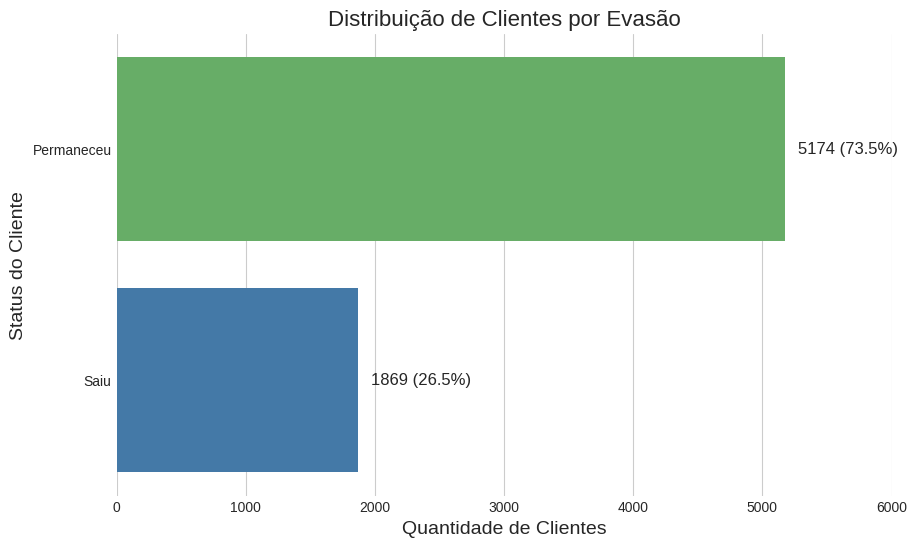

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_tratado.copy()

# --- Preparação para o Gráfico ---
# Para facilitar a plotagem, podemos mapear os números de volta para os textos
# Isso ajuda o Seaborn a criar as legendas corretas automaticamente.
df_plot['Status do Cliente'] = df_plot['Churn'].map({0: 'Permaneceu', 1: 'Saiu'})

# Define o estilo do gráfico para ficar parecido com o seu
plt.style.use('seaborn-v0_8-whitegrid') # ou 'fivethirtyeight' que é bem parecido com o seu

# --- Criação do Gráfico ---
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Status do Cliente', data=df_plot, palette=['#5cb85c', '#337ab7'],
                   order=['Permaneceu', 'Saiu']) # Garante a ordem das barras

# --- Adicionando os Rótulos (Contagem e Porcentagem) ---
total = len(df_plot)
for p in ax.patches:
    # Pega a largura da barra (que é a contagem)
    width = p.get_width()
    # Calcula a porcentagem
    percentage = f'({100 * width / total:.1f}%)'
    # Define a posição do texto
    x = p.get_x() + width + 100 # Posição X (um pouco depois da barra)
    y = p.get_y() + p.get_height() / 2. # Posição Y (centralizada na altura da barra)
    # Adiciona o texto ao gráfico
    ax.text(x, y, f'{int(width)} {percentage}', va='center', fontsize=12)

# --- Finalização e Customização ---
ax.set_title('Distribuição de Clientes por Evasão', fontsize=16)
ax.set_xlabel('Quantidade de Clientes', fontsize=14)
ax.set_ylabel('Status do Cliente', fontsize=14)
ax.set_xlim(0, 6000) # Ajusta o limite do eixo X para dar espaço aos rótulos

# Remove as bordas desnecessárias para um visual mais limpo
sns.despine(left=True, bottom=True)

plt.show()

## Balanceamento de dados:

Instalando a biblioteca 'imbalanced-learn':

In [12]:
!pip install imbalanced-learn

Aplicando o balanceamento **SMOTE** **apenas** no conjunto de **treino**:

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separando as variáveis preditoras (X) da variável alvo (y) ---
X = df_tratado.drop('Churn', axis=1)
y = df_tratado['Churn']

# Dividindo os dados em treino e teste ANTES de balancear ---
# O conjunto de teste (X_test, y_test) permanecerá desbalanceado, como no mundo real.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Proporção de Churn ANTES do SMOTE (no treino):")
print(y_train.value_counts(normalize=True))
print("-" * 50)


# Aplicando o SMOTE APENAS nos dados de treino ---
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Verificando o resultado do balanceamento ---
print("Proporção de Churn DEPOIS do SMOTE (no treino):")
print(y_train_balanced.value_counts(normalize=True))
print("-" * 50)

print("Dimensões de X_train antes do SMOTE:", X_train.shape)
print("Dimensões de X_train depois do SMOTE:", X_train_balanced.shape)

Proporção de Churn ANTES do SMOTE (no treino):
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
--------------------------------------------------
Proporção de Churn DEPOIS do SMOTE (no treino):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
--------------------------------------------------
Dimensões de X_train antes do SMOTE: (4930, 31)
Dimensões de X_train depois do SMOTE: (7244, 31)


Padronização (Standardization) dos Dados:

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Agora com dados já estão divididos e balanceados da etapa anterior:
# X_train_balanced, y_train_balanced
# X_test, y_test

# 1. Inicializando o Scaler
scaler = StandardScaler()

# 2. Ajustando o scaler APENAS nos dados de treino e transformá-los
# Usamos fit_transform() como um atalho para ajustar e transformar de uma vez
X_train_scaled = scaler.fit_transform(X_train_balanced)

# 3. Usando o scaler JÁ AJUSTADO para transformar os dados de teste
# Note que aqui usamos apenas transform(), não fit_transform()
X_test_scaled = scaler.transform(X_test)

# --- Verificando (Opcional, mas muito útil para entender) ---

# O resultado do scaler é um array NumPy. Para facilitar a visualização,
# convertemos de volta para um DataFrame.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_balanced.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("--- Dados de Treino Padronizados (5 primeiras linhas) ---")
print(X_train_scaled_df.head())
print("\n--- Média de cada coluna nos dados de treino (deve ser próxima de 0) ---")
print(X_train_scaled_df.mean().head())
print("\n--- Desvio Padrão de cada coluna nos dados de treino (deve ser próximo de 1) ---")
print(X_train_scaled_df.std().head())

--- Dados de Treino Padronizados (5 primeiras linhas) ---
      Idoso  Parceiro  Dependentes  Tempo_Contrato  Telefone  Fatura_Digital  \
0 -0.392264 -0.767882    -0.525382       -0.562234  0.328867       -1.239164   
1 -0.392264 -0.767882    -0.525382       -0.938364  0.328867        0.806996   
2 -0.392264  1.302284    -0.525382        0.315403  0.328867        0.806996   
3 -0.392264  1.302284    -0.525382        1.276625  0.328867        0.806996   
4 -0.392264 -0.767882    -0.525382       -1.063741  0.328867        0.806996   

   Gasto_Mensal  Gasto_Total  Gasto_Medio_Mensal  Genero_Masculino  \
0      0.290200    -0.422420            0.403326          1.146463   
1      0.065481    -0.775810            0.044091          1.146463   
2      0.246650     0.246894            0.187359          1.146463   
3      0.626408     1.308830            0.559381          1.146463   
4     -0.645260    -0.882586           -0.377128         -0.872248   

   Multiplas_Linhas_Não possui serviço  

Resumo:

- scaler = StandardScaler(): Criamos um objeto que sabe como padronizar dados.
- scaler.fit_transform(X_train_balanced): O scaler olhou para - X_train_balanced, calculou a média e o desvio padrão de cada
uma das 31 colunas, e usou esses valores para transformar os dados.
- scaler.transform(X_test): O scaler usou as médias e desvios padrão que ele aprendeu do conjunto de treino para transformar o conjunto de teste. Isso garante que os dois conjuntos de dados sejam padronizados exatamente da mesma maneira.

- Dados de Treino: X_train_scaled e y_train_balanced (balanceados e padronizados).
- Dados de Teste: X_test_scaled e y_test (desbalanceados como na vida real, mas padronizados da mesma forma que o treino).

---
# Correlação e Seleção de Variáveis

### **Objetivo: Quais variáveis têm a maior correlação (positiva ou negativa) com a variável Churn?**

## Análise de Correlação:

--- Principais Variáveis Correlacionadas com o Churn ---
Servico_Internet_Fiber optic                0.319040
Gasto_Mensal                                0.221378
Gasto_Medio_Mensal                          0.220338
Metodo_Pagamento_Electronic check           0.206322
Fatura_Digital                              0.130780
Idoso                                       0.017055
Streaming_TV_Sim                           -0.014372
Telefone                                   -0.020932
Streaming_Filmes_Sim                       -0.037742
Multiplas_Linhas_Sim                       -0.060739
Multiplas_Linhas_Não possui serviço        -0.069385
Genero_Masculino                           -0.167761
Metodo_Pagamento_Mailed check              -0.176674
Protecao_Dispositivo_Sim                   -0.204758
Backup_Online_Sim                          -0.228271
Gasto_Total                                -0.254967
Metodo_Pagamento_Credit card (automatic)   -0.266132
Backup_Online_Não possui serviço          

/tmp/ipython-input-361784811.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_com_churn.values, y=corr_com_churn.index, palette='vlag')


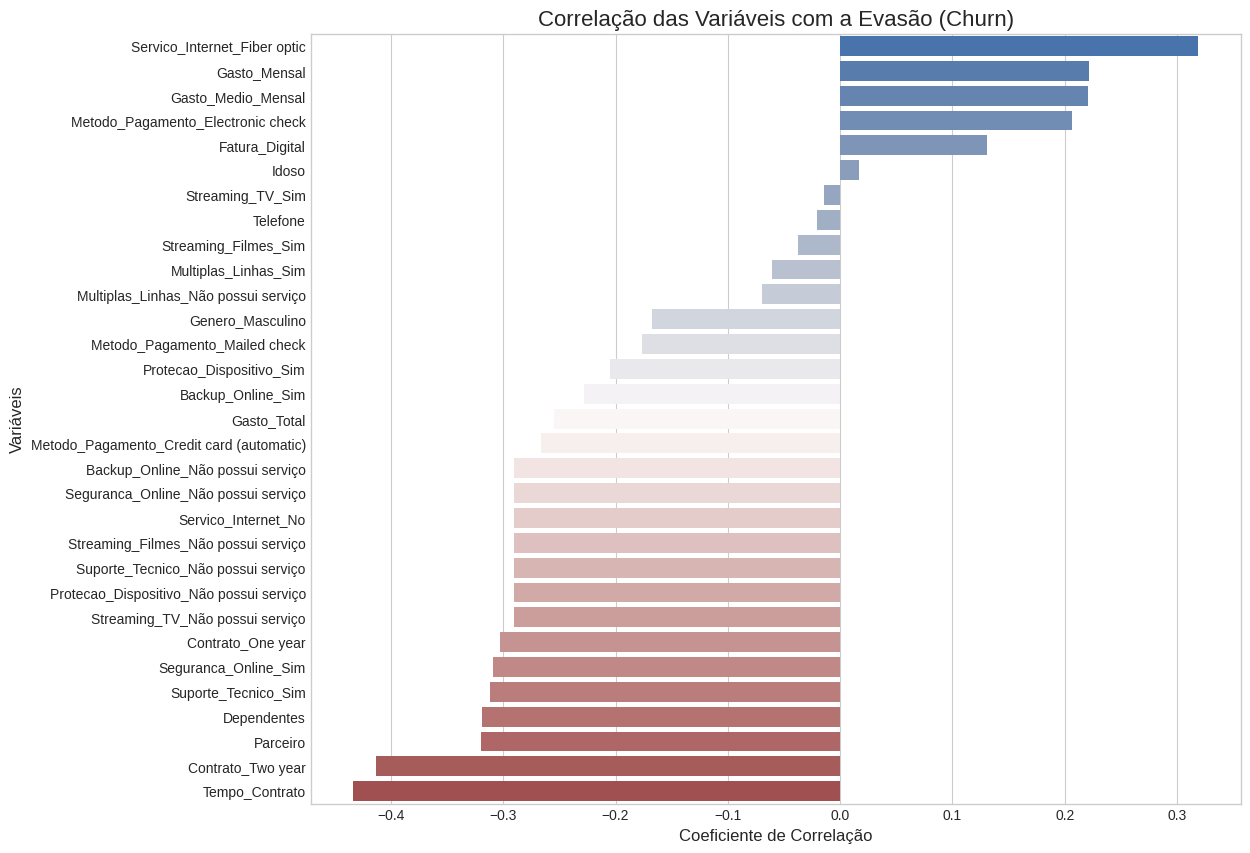

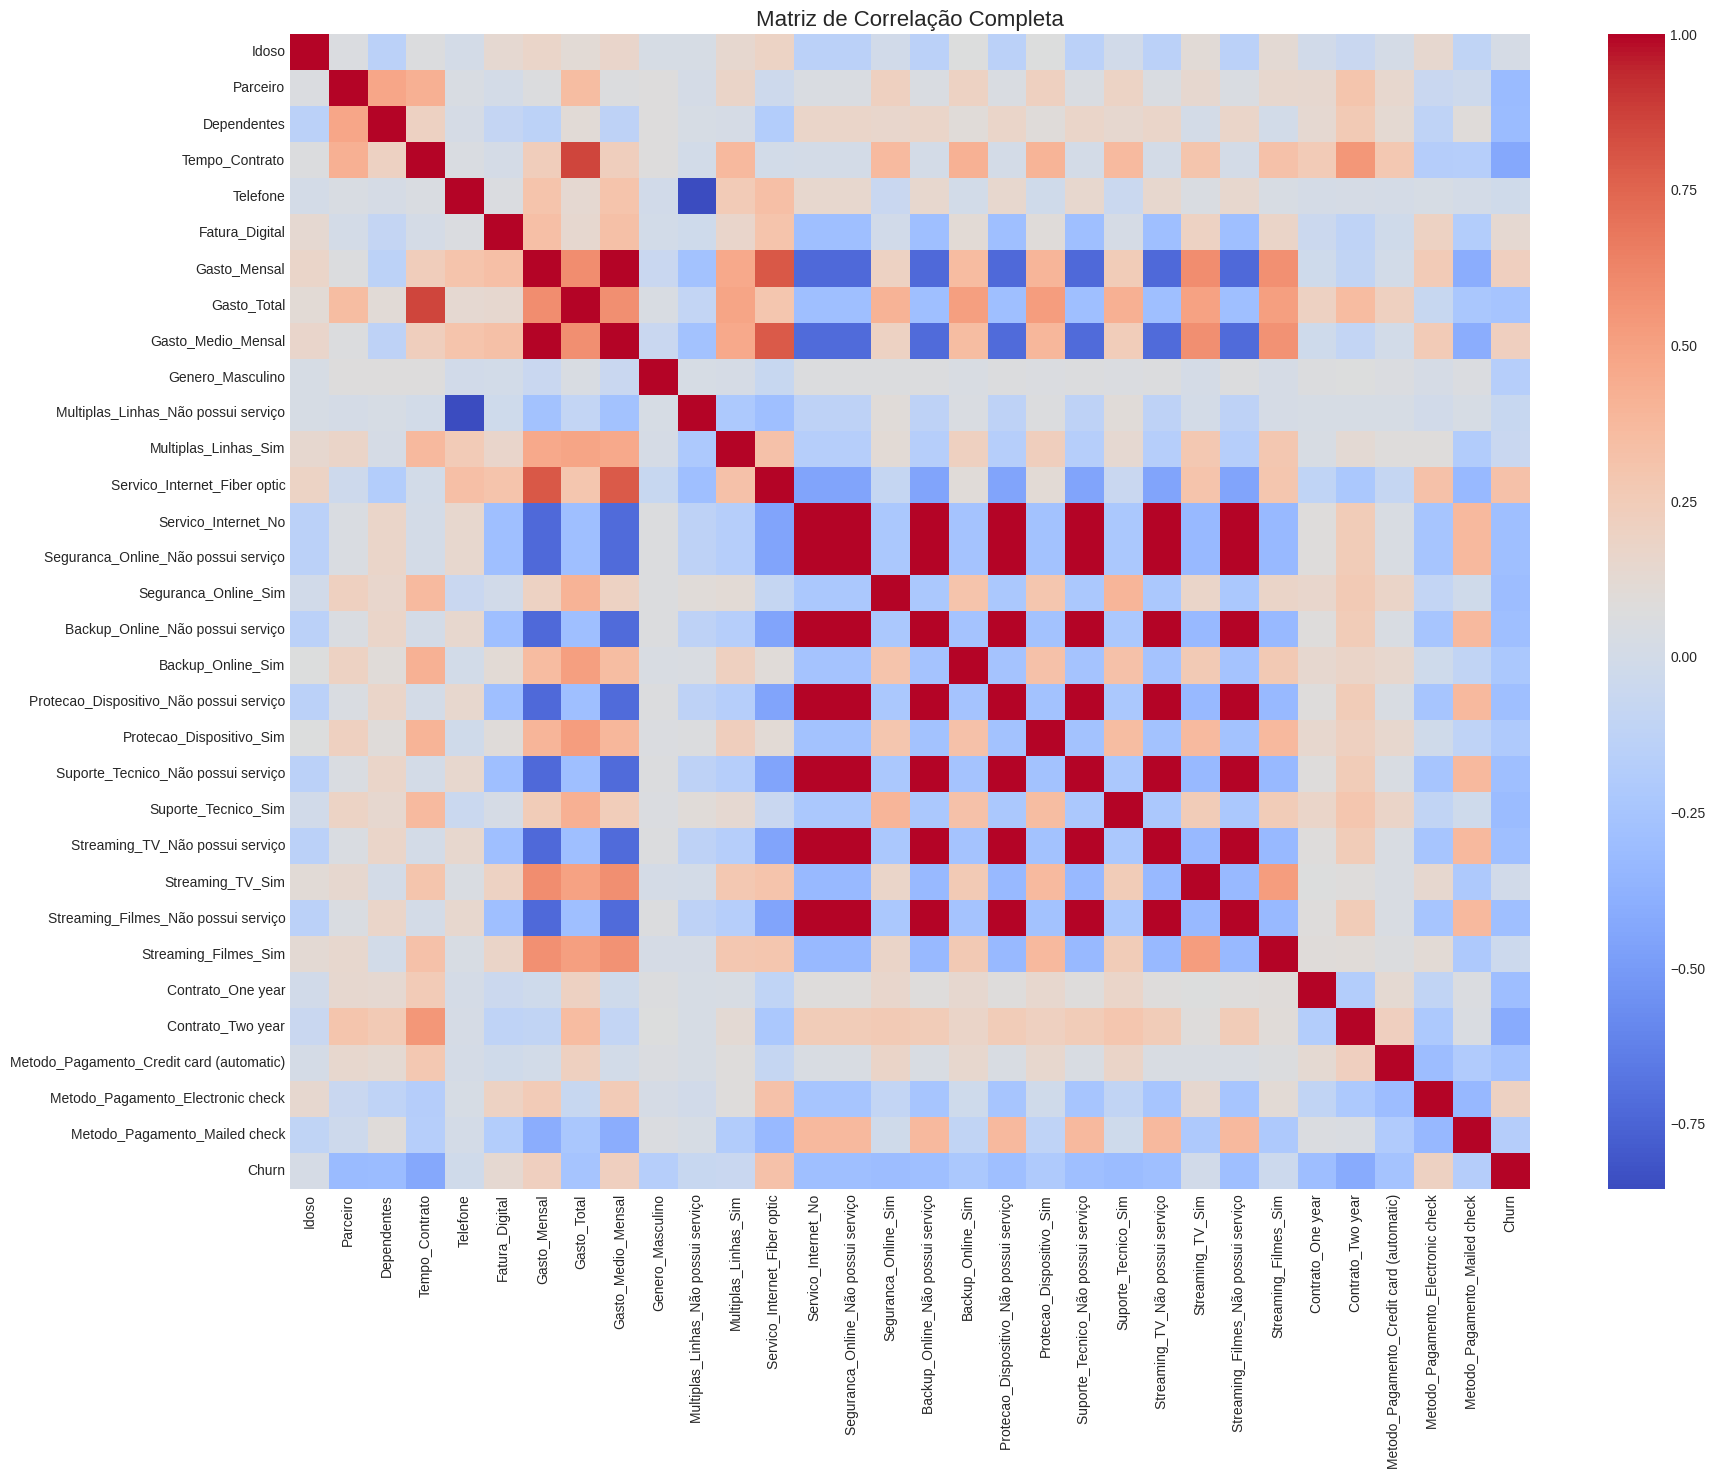

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Recombinando os dados de treino para análise ---
# Lembre-se que X_train_scaled é um array NumPy, então vamos usar o DataFrame que criamos para verificação.
# O y_train_balanced precisa ter seu índice resetado para concatenar corretamente.
df_analise = pd.concat([X_train_scaled_df, y_train_balanced.reset_index(drop=True)], axis=1)

# 2. Calculando a matriz de correlação completa ---
matriz_correlacao = df_analise.corr()

# 3. Isolando e ordenar as correlações com a variável 'Churn' ---
# Isso nos dará a visão mais importante e direta.
corr_com_churn = matriz_correlacao['Churn'].drop('Churn').sort_values(ascending=False)

print("--- Principais Variáveis Correlacionadas com o Churn ---")
print(corr_com_churn)

# 4. Visualizando essas correlações em um gráfico de barras ---
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_com_churn.values, y=corr_com_churn.index, palette='vlag')
plt.title('Correlação das Variáveis com a Evasão (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.show()


# 5. Visualizando a Matriz de Correlação Completa ---
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacao, cmap='coolwarm', annot=False) # annot=False para não poluir com números
plt.title('Matriz de Correlação Completa', fontsize=16)
plt.show()

## Análise dos Resultados de Correlação

- Fatores que **aumentam** a Chance de Churn (Correlação Positiva 🚩):

**1.  Servico_Internet_Fiber optic (Correlação: 0.32):**

Este é o fator com a **correlação positiva mais forte.** Isso pode parecer contraintuitivo, afinal, fibra óptica é um serviço premium. A hipótese aqui não é que a fibra seja ruim, mas talvez que seja **mais cara**, atraindo clientes mais sensíveis a preço, ou que a **concorrência por fibra seja mais acirrada, facilitando a troca de provedor**.

--------------------------------------------------

**2. Gasto_Mensal / Gasto_Medio_Mensal (Correlação: ~0.22):**

Relação direta e esperada. Quanto maior a conta mensal, maior a probabilidade do cliente cancelar. Isso reforça a hipótese do preço.

---------------------------------------------------

**3. Metodo_Pagamento_Electronic check (Correlação: 0.21):**

Clientes que usam cheque eletrônico são mais propensos a sair. Isso pode indicar um **perfil de cliente com menos "vínculo" com a empresa**, já que não é um método de pagamento automático e recorrente como o cartão de crédito.

---------------------------------------------------

**4. Fatura_Digital (Correlação: 0.13):**

Uma correlação mais fraca, mas presente. Clientes com fatura digital podem ser mais **engajados digitalmente** e, portanto, mais** propensos a pesquisar e trocar de provedor online.**

--------------------------------------------------

- Fatores que **diminuem** a Chance de Churn (Correlação Negativa ✅)

*Estes são os fatores de retenção.*

**1.Tempo_Contrato (Correlação: -0.43):**

Este é o fator de retenção mais forte. Quanto mais tempo um cliente está na base, menor a sua chance de sair. Lealdade e inércia são fatores poderosos.

---------------------------------------------------

**2. Contrato_Two year (Correlação: -0.41):**

Quase tão forte quanto o tempo de contrato. Clientes com contratos de dois anos estão "presos" por mais tempo e, provavelmente, mais satisfeitos com o serviço a longo prazo. O contrato mensal (que é a ausência dos contratos anuais) é, por dedução, um grande fator de risco.

-------------------------------------------------------

**3. Parceiro e Dependentes (Correlação: ~-0.32):**

Clientes que têm parceiros e/ou dependentes são significativamente menos propensos a cancelar. Isso sugere que o serviço de telecomunicações é visto como uma "utilidade familiar", tornando a decisão de troca mais complexa e menos provável.

---------------------------------------------------

**4. Suporte_Tecnico_Sim / Seguranca_Online_Sim (Correlação: ~-0.31):**

Clientes que assinam serviços de valor agregado, como suporte técnico e segurança online, tendem a ficar mais. Isso indica que quanto mais "integrado" o cliente está no ecossistema de serviços da empresa, mais valioso ele se sente e menor a chance de churn.

## Análises Direcionadas

/tmp/ipython-input-1604820648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_tratado, palette=['#5cb85c', '#d9534f'])


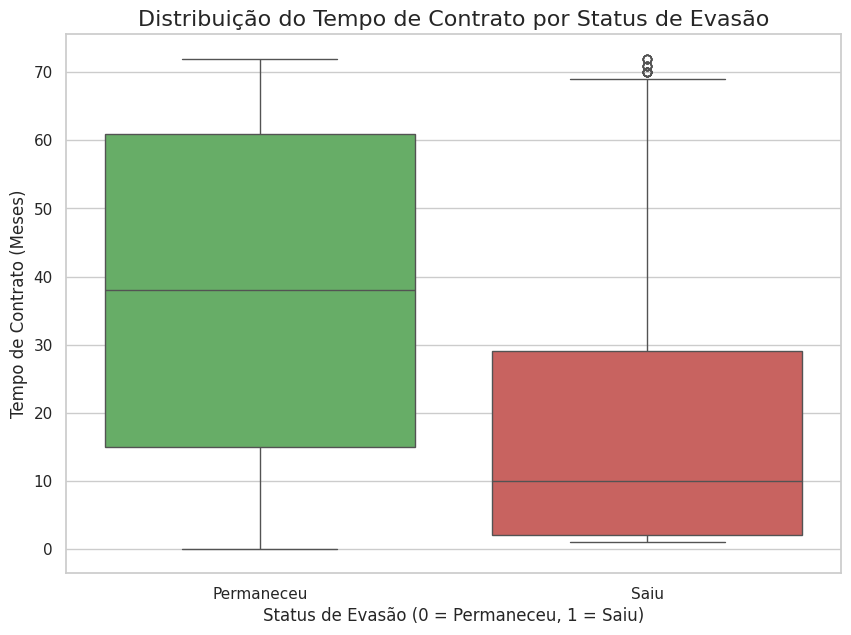

/tmp/ipython-input-1604820648.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Gasto_Total', data=df_tratado, palette=['#5cb85c', '#d9534f'])


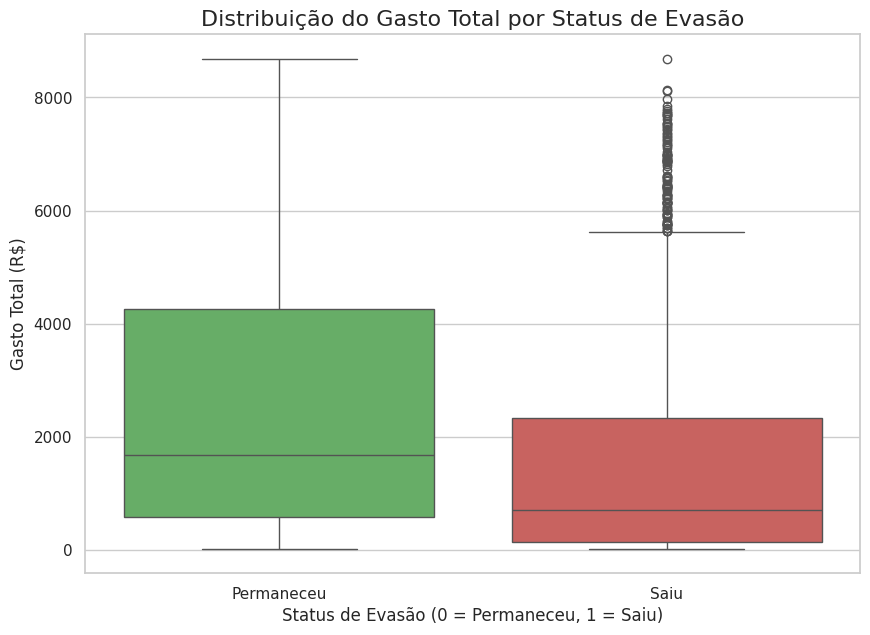

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# df já tem a coluna 'Churn' como 0 e 1.

# Definindo um estilo visual agradável
sns.set(style="whitegrid")

# --- 1. Análise: Tempo de Contrato vs. Evasão ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_tratado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribuição do Tempo de Contrato por Status de Evasão', fontsize=16)
plt.xlabel('Status de Evasão (0 = Permaneceu, 1 = Saiu)', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu']) # Rótulos mais claros no eixo X
plt.show()

# --- 2. Análise: Gasto Total vs. Evasão ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='Gasto_Total', data=df_tratado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribuição do Gasto Total por Status de Evasão', fontsize=16)
plt.xlabel('Status de Evasão (0 = Permaneceu, 1 = Saiu)', fontsize=12)
plt.ylabel('Gasto Total (R$)', fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Saiu']) # Rótulos mais claros no eixo X
plt.show()

**Análise do Boxplot 1: Tempo de Contrato**

*Existe uma diferença drástica e inegável entre os dois grupos.*

**- Clientes que Permaneceram (Verde):**

A caixa está muito alta. A linha do meio (mediana) mostra que metade desses clientes tem mais de 38 meses de contrato. Eles são, em geral, clientes de longa data.

---

**- Clientes que Saíram (Vermelho):**

A caixa está esmagada na parte de baixo do gráfico. A mediana é baixíssima, em torno de 10 meses. Metade dos clientes que cancelam o fazem antes do décimo mês.

---

**-Insight Principal:**

O churn é um fenômeno que acontece predominantemente com clientes novos. Os primeiros meses são o período mais crítico para a retenção. Se um cliente passa da marca de 30-40 meses, a chance de ele cancelar diminui drasticamente. Isso confirma visualmente a forte correlação negativa que você encontrou.

**Análise do Boxplot 2: Gasto Total**

**- Clientes que Permaneceram (Verde):** A mediana do gasto total é significativamente maior (em torno de R$1700). Ao longo de seu tempo com a empresa, eles geraram muito mais receita.

---

**- Clientes que Saíram (Vermelho):** A mediana do gasto total é bem menor (em torno de R$700).

---

**- Insight Principal (e muito importante!):** Este gráfico resolve um aparente paradoxo. Lembre-se que um Gasto_Mensal alto tinha uma correlação positiva com o churn. No entanto, o Gasto_Total é muito menor para quem sai. O motivo é exatamente o que vimos no primeiro gráfico: eles ficam por tão pouco tempo que não conseguem acumular um gasto total elevado.

## Criação de Modelos Preditivos:

**Modelos escolhidos:**

- Regressão Logística: Um modelo clássico que requer dados padronizados. Servirá como nosso baseline.

- Random Forest (Floresta Aleatória): Um modelo mais complexo e robusto que não requer dados padronizados.

### Modelo 1: Regressão Logística (O Modelo Baseline Sensível à Escala)

**Justificativa da Escolha:**

A Regressão Logística é um dos algoritmos mais fundamentais para problemas de classificação. A escolha dela como nosso primeiro modelo é estratégica por três motivos:

- Simplicidade e Rapidez: É um modelo computacionalmente leve e rápido de treinar.

- Excelente Baseline: Seu desempenho nos dá um ponto de referência sólido. Qualquer modelo mais complexo que criarmos deve, no mínimo, superar a Regressão Logística para justificar sua complexidade.

- Interpretabilidade: É um modelo de "caixa branca", o que significa que podemos interpretar facilmente os coeficientes (pesos) que ele atribui a cada variável para entender o que influencia sua decisão.

---

**A Necessidade da Padronização:**

A Regressão Logística funciona calculando uma soma ponderada das variáveis de entrada. Se as variáveis tiverem escalas muito diferentes (ex: Gasto_Total em milhares e Idoso em 0 ou 1), o modelo dará um peso desproporcional à variável com a maior escala, simplesmente por causa da magnitude de seus valores, e não por seu poder preditivo real.

In [23]:
from sklearn.linear_model import LogisticRegression

# 1. Inicializar o modelo
# Usamos random_state para garantir que os resultados sejam reproduzíveis
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Treinar o modelo com os dados de treino balanceados e padronizados
print("Iniciando o treinamento do modelo de Regressão Logística...")
log_reg.fit(X_train_scaled, y_train_balanced)
print("Modelo de Regressão Logística treinado com sucesso!")

Iniciando o treinamento do modelo de Regressão Logística...
Modelo de Regressão Logística treinado com sucesso!


---

### Modelo 2: Random Forest (O Modelo Robusto Baseado em Árvore)

**Justificativa da Escolha:**

O Random Forest é um dos modelos mais populares e eficazes para problemas de classificação como este.
Alto Desempenho: Geralmente, oferece uma precisão significativamente maior do que modelos lineares como a Regressão Logística.

- Robustez:

É um modelo de conjunto (ensemble), o que significa que ele constrói múltiplas árvores de decisão e combina seus resultados (uma "votação da floresta"). Isso o torna muito menos propenso a overfitting (quando o modelo decora os dados de treino em vez de aprender padrões gerais).

- Importância das Variáveis:

Ele possui um recurso embutido (feature_importances_) que nos diz quais variáveis foram mais importantes para suas decisões, o que é extremamente valioso para a análise estratégica.

---

- A (Não) Necessidade da Padronização:

Modelos baseados em árvores, como o Random Forest, não são sensíveis à escala dos dados. Eles tomam decisões fazendo uma série de perguntas sequenciais sobre uma única variável por vez, como: "O Tempo_Contrato do cliente é maior que 12.5 meses?". Para essa pergunta, não importa se o Gasto_Total está na casa dos milhares ou se Idoso é 0 ou 1. O modelo simplesmente encontra o melhor "ponto de corte" para cada variável, independentemente de sua escala.

In [24]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inicializar o modelo
rf_clf = RandomForestClassifier(random_state=42)

# 2. Treinar o modelo com os mesmos dados de treino
print("\nIniciando o treinamento do modelo Random Forest...")
rf_clf.fit(X_train_scaled, y_train_balanced)
print("Modelo Random Forest treinado com sucesso!")


Iniciando o treinamento do modelo Random Forest...
Modelo Random Forest treinado com sucesso!


## **Análise Crítica dos Resultados (Interpretando os Números)**

--- Avaliação do Modelo: Regressão Logística ---
                precision    recall  f1-score   support

Permaneceu (0)       0.87      0.80      0.83      1552
      Saiu (1)       0.54      0.67      0.60       561

      accuracy                           0.76      2113
     macro avg       0.71      0.73      0.71      2113
  weighted avg       0.78      0.76      0.77      2113


--- Avaliação do Modelo: Random Forest ---
                precision    recall  f1-score   support

Permaneceu (0)       0.86      0.83      0.84      1552
      Saiu (1)       0.57      0.62      0.59       561

      accuracy                           0.77      2113
     macro avg       0.71      0.72      0.72      2113
  weighted avg       0.78      0.77      0.78      2113



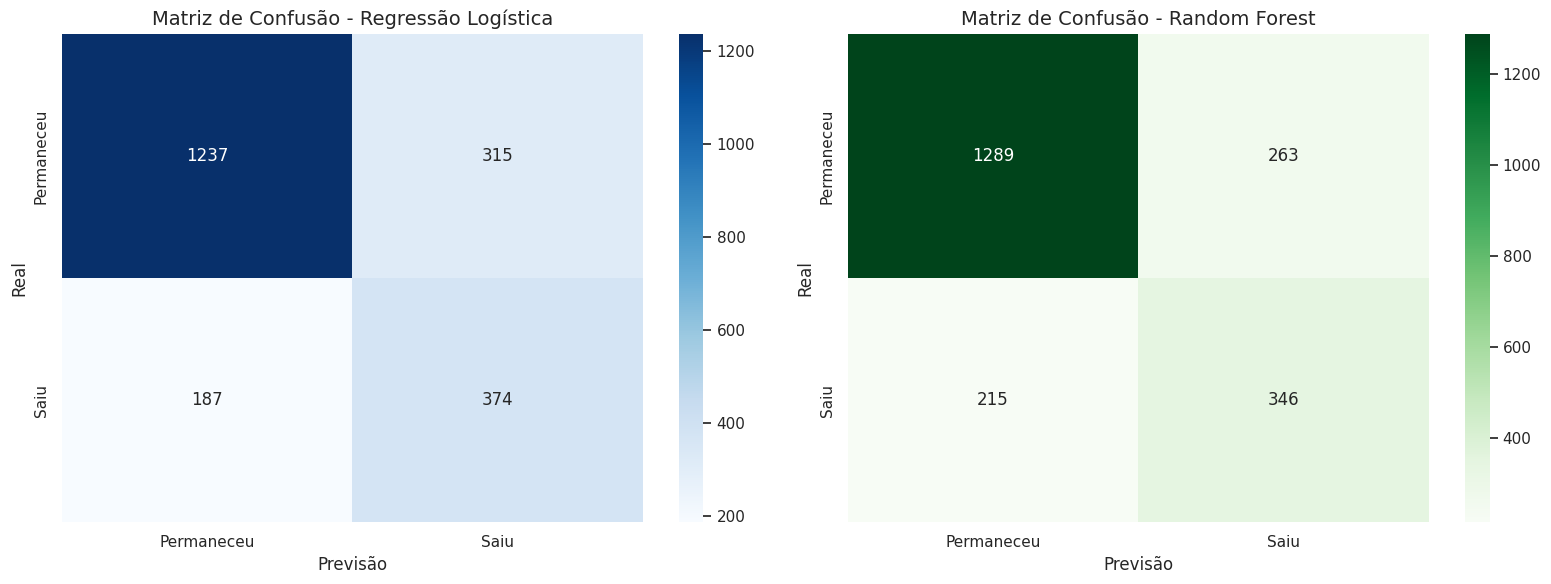

In [25]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Fazer as previsões nos dados de teste ---
# Estes são dados que os modelos nunca viram antes.
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)

# --- 2. Avaliação da Regressão Logística ---
print("--- Avaliação do Modelo: Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Matriz de Confusão para Regressão Logística
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# --- 3. Avaliação do Random Forest ---
print("\n--- Avaliação do Modelo: Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Matriz de Confusão para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)


# --- 4. Visualização das Matrizes de Confusão ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz para Regressão Logística
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística', fontsize=14)
axes[0].set_xlabel('Previsão')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['Permaneceu', 'Saiu'])
axes[0].set_yticklabels(['Permaneceu', 'Saiu'])

# Matriz para Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest', fontsize=14)
axes[1].set_xlabel('Previsão')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['Permaneceu', 'Saiu'])
axes[1].set_yticklabels(['Permaneceu', 'Saiu'])

plt.tight_layout()
plt.show()

## **1. ✅ Análise Geral**

**Regressão Logística:**
---

**- Verdadeiros Positivos (Saiu/Saiu):** 374 - 10/10. O modelo identificou corretamente 374 clientes que de fato cancelaram o serviço.

**- Verdadeiros Negativos (Permaneceu/Permaneceu):** 1237 - 10/10. O modelo previu corretamente que 1237 clientes ficariam na base.

**- Falsos Positivos (Permaneceu/Saiu):** 315 - Este é um erro - 03/10. O modelo achou que 315 clientes iriam sair, mas eles na verdade permaneceram. Isso poderia gerar custos de retenção desnecessários.

**- Falsos Negativos (Saiu/Permaneceu):** 187 - Este é o erro mais perigoso para o negócio - 01/10. O modelo previu que 187 clientes ficariam, mas eles na verdade cancelaram. São oportunidades de retenção perdidas.

- Do classification_report, vemos que para a classe "Saiu (1)":

- Recall de 0.67: Significa que o modelo conseguiu encontrar 67% de todos os clientes que realmente cancelaram. De cada 3 clientes que cancelaram, ele encontrou 2.

- Precisão de 0.54: Significa que, de todos os clientes que o modelo marcou como "risco de sair", 54% deles realmente saíram.

---

**Random Forest:**
---

**- Verdadeiros Positivos (Saiu/Saiu):** 346 - Bom, mas identificou 28 clientes a menos que a Regressão Logística - 06/10.

**- Verdadeiros Negativos (Permaneceu/Permaneceu):** 1289 - Excelente, errou menos ao classificar quem ficaria - 08/10.

**- Falsos Positivos (Permaneceu/Saiu):** 263 - Um erro menor que o da Regressão Logística. Gerou menos "alarmes falsos" - 08/10.

**- Falsos Negativos (Saiu/Permaneceu):** 215 - Este é o ponto fraco. Deixou de identificar 215 clientes que cancelaram, 28 a mais que o outro modelo - 01/10.

- Do classification_report, vemos que para a classe "Saiu (1)":

- Recall de 0.62: Conseguiu encontrar 62% dos clientes que realmente cancelaram. Um pouco inferior à Regressão Logística.

- Precisão de 0.57: Um pouco melhor. De todos que ele marcou como "risco", 57% realmente saíram.


## **2. ✅ Qual modelo teve o melhor desempenho?**

Os F1-scores são quase idênticos (0.60 vs 0.59), o que indica que a performance geral é muito similar. A decisão está no trade-off entre Precisão e Recall.

**- Caso de Uso 1: Maximizar a Retenção (Priorizar o Recall)**

Se o objetivo principal da Telecom X é **não perder nenhuma oportunidade de reter um cliente**, então a **Regressão Logística é a melhor escolha**. Ela tem um Recall maior (67%), o que significa que ela **"pesca" um número maior de clientes que estão prestes a sair**. O custo disso é contatar mais pessoas que não iriam sair (menor precisão).

---

**- Caso de Uso 2: Otimizar os Custos de Retenção (Priorizar a Precisão)**

Se as ações de retenção são muito caras (ex: oferecer grandes descontos) e a **empresa quer ter a maior certeza possível antes de agir**, então o **Random Forest é marginalmente melhor**. Ele tem uma **Precisão maior** (57%), garantindo que os recursos sejam gastos em clientes com uma probabilidade um pouco maior de realmente cancelar.

## **3. ✅ Análise de Overfitting ou Underfitting**

- Random Forest:

É muito comum que modelos de Random Forest, sem ajuste de parâmetros, apresentem um desempenho quase perfeito nos dados de treino. O fato de o desempenho no teste ser bom, mas não espetacular (e ligeiramente inferior ao modelo mais simples no Recall), é um forte indicativo de um leve overfitting. Ele aprendeu tão bem os dados de treino (incluindo os sintéticos do SMOTE) que perdeu um pouco da capacidade de generalizar.

*Ajuste sugerido: Limitar a profundidade das árvores (max_depth) para simplificar o modelo.*  

---

- Regressão Logística:

Como é um modelo mais simples, é menos propenso a overfitting. O desempenho sólido e consistente no teste sugere que ele capturou bem as tendências principais dos dados sem "decorá-los". Pode-se dizer que ele tem um bom ajuste (good fit) para este problema.

## **4. ✅ Recomendação**

Para um problema de churn, o custo de perder um cliente (Falso Negativo) é quase sempre maior do que o custo de tentar reter um cliente que não iria sair (Falso Positivo). Portanto, o modelo de **Regressão Logística, com seu Recall superior, é o que entrega mais valor para o negócio neste caso.**

## **Visualização das Análises**

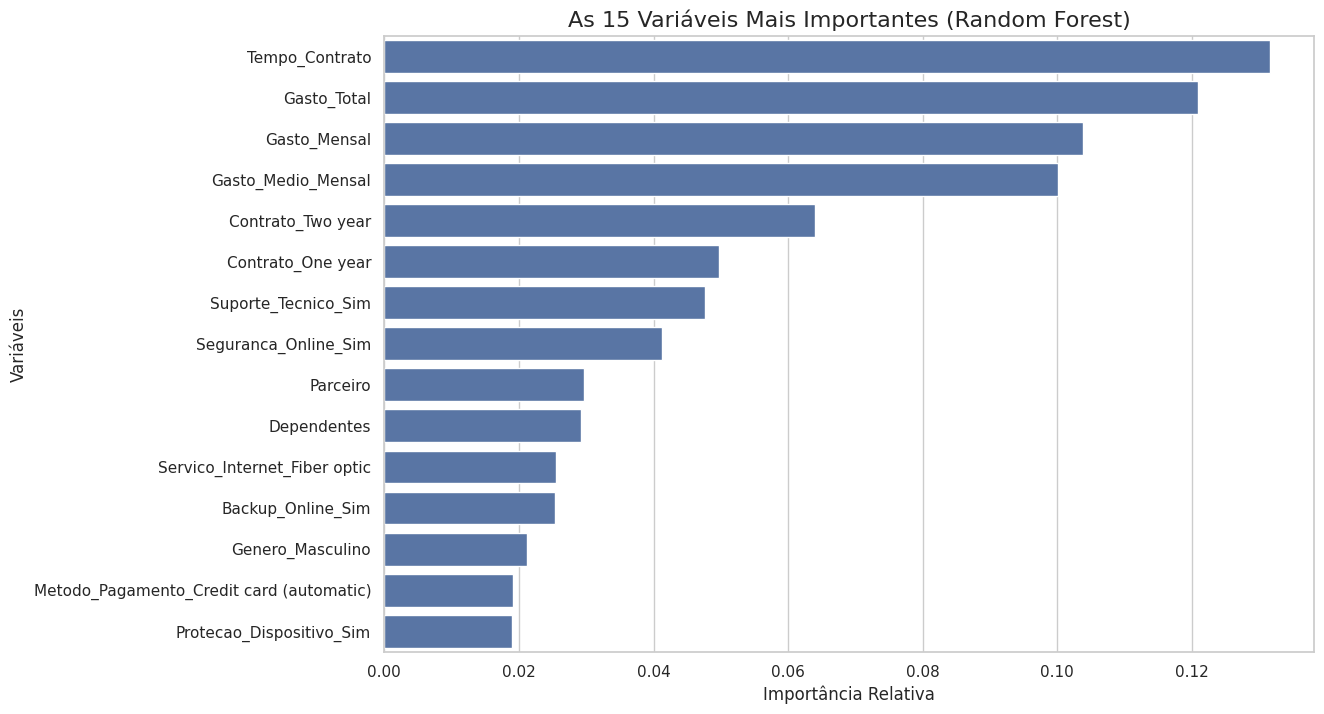

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'rf_clf' é seu modelo Random Forest treinado e 'X' é seu dataframe antes da padronização (para pegar os nomes das colunas)

# 1. Extrair a importância das variáveis
importances = rf_clf.feature_importances_

# 2. Criar um DataFrame para visualização
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 3. Visualizar as 15 variáveis mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index)
plt.title('As 15 Variáveis Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.show()

**O Conceito é:**

O modelo constrói centenas de árvores de decisão. Cada vez que ele divide os dados, ele escolhe a variável que melhor separa os clientes que "saíram" dos que "permaneceram". A "importância" de uma variável é, de forma simplificada, a média de quão útil ela foi em todas essas decisões.

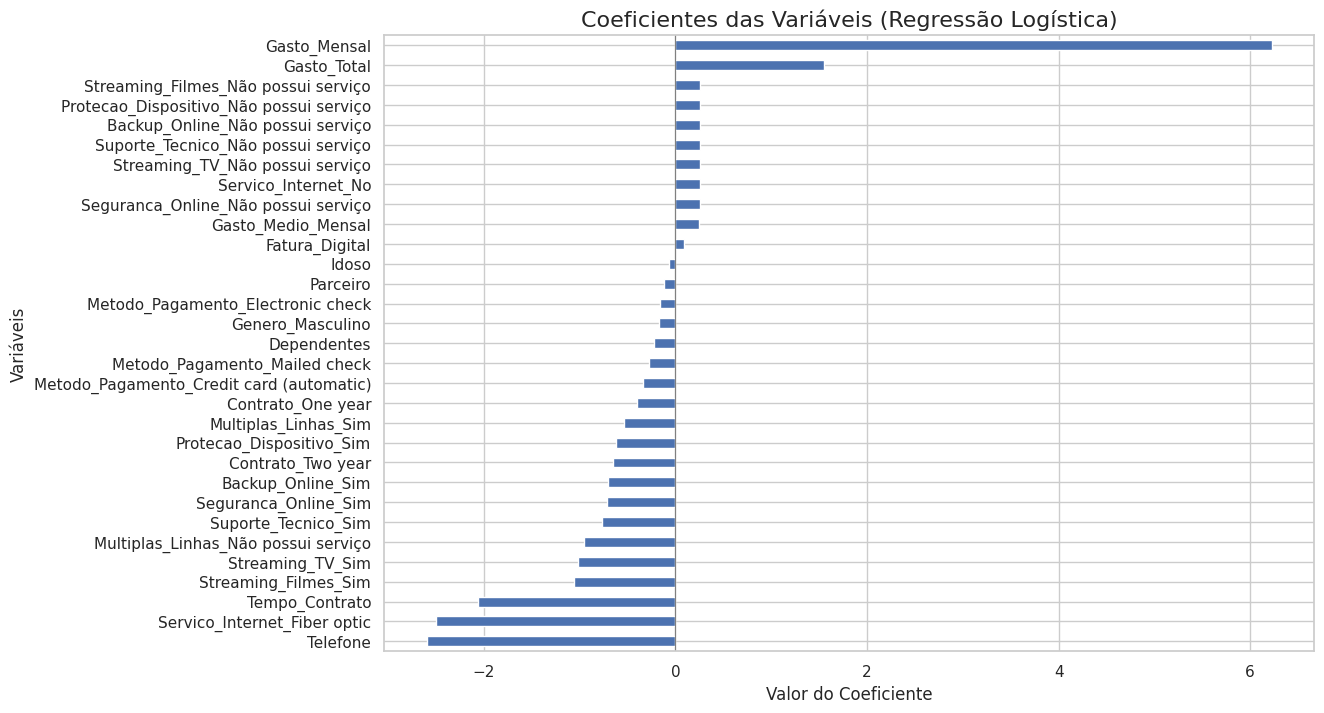

In [28]:
# 1. Extrair os coeficientes
coefficients = log_reg.coef_[0]

# 2. Criar um DataFrame para visualização
feature_coefficients = pd.Series(coefficients, index=X.columns).sort_values()

# 3. Visualizar os maiores pesos (positivos e negativos)
plt.figure(figsize=(12, 8))
feature_coefficients.plot(kind='barh')
plt.title('Coeficientes das Variáveis (Regressão Logística)', fontsize=16)
plt.xlabel('Valor do Coeficiente', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(0, color='grey', linewidth=0.8) # Linha no zero para separar
plt.show()

**O Conceito:**

O modelo atribui um "peso" (coeficiente) a cada variável.

- Peso Positivo: Aumenta a probabilidade de churn.
- Peso Negativo: Diminui a probabilidade de churn.

# **Resultado Final:**

Embora ambos os modelos, **Regressão Logística** e **Random Forest**, tenham apresentado um desempenho geral muito semelhante (F1-score de 0.60 e 0.59, respectivamente), o modelo de Regressão Logística foi selecionado como o de melhor desempenho para o objetivo estratégico da Telecom X.


A razão para esta escolha está no **Recall superior** (67% vs 62%) para a classe de clientes que cancelaram ('Saiu'). Em um cenário de previsão de churn, é mais custoso para a empresa não identificar um cliente que está prestes a sair (um Falso Negativo) do que contatar um cliente que não iria sair (um Falso Positivo). O Recall mais alto da Regressão Logística garante que a empresa consiga identificar e agir sobre uma porcentagem maior de clientes em risco real, maximizando as oportunidades de retenção."

## *Fontes e Referências para os Conceitos Aplicados*

**1. Pré-processamento de Dados (Geral)
Conceito: A necessidade de preparar e limpar os dados antes de alimentar os modelos de machine learning.**


*Fonte (Documentação): Scikit-learn - Preprocessing data*

- Descrição: A documentação oficial da biblioteca Scikit-learn, que é a principal referência para a implementação prática. Explica a importância da padronização, normalização e encoding.

---

**2. Balanceamento de Classes com SMOTE
Conceito: Técnica de oversampling que cria amostras sintéticas da classe minoritária para corrigir o desequilíbrio dos dados de treino.**

*Fonte (Documentação): Imbalanced-learn - SMOTE*

- Descrição: A documentação oficial da biblioteca imbalanced-learn, mostrando como usar o SMOTE e seus parâmetros.

---

*Fonte (Artigo Original): "SMOTE: Synthetic Minority Over-sampling Technique" por N. V. Chawla et al.*

- Descrição: Este é o artigo científico original que propôs o método. Citar o artigo acadêmico demonstra uma profundidade maior na pesquisa.

*Fonte (Explicação Intuitiva): Towards Data Science - "SMOTE Explained for Noobs"*

-Descrição: Um artigo que explica de forma clara e com exemplos como o algoritmo SMOTE funciona internamente, ideal para entender a lógica por trás da criação dos dados sintéticos.

---

**3. Divisão em Dados de Treino e Teste (train_test_split)
Conceito: A prática fundamental de dividir o conjunto de dados para treinar o modelo em uma parte e avaliá-lo de forma imparcial em outra, que ele nunca viu antes.*

*Fonte (Documentação): Scikit-learn - train_test_split*

- Descrição: A documentação da função específica, explicando seus parâmetros como test_size, random_state e, crucialmente, stratify, que usamos para manter a proporção de classes.

---

**4. Padronização de Dados (StandardScaler)
Conceito: Transformar as variáveis para que tenham média 0 e desvio padrão 1, colocando-as em uma mesma escala.**

*Fonte (Documentação): Scikit-learn - StandardScaler*

- Descrição: A documentação da ferramenta que utilizamos. Explica a diferença entre os métodos .fit(), .transform() e .fit_transform(), que é crucial para evitar o vazamento de dados (data leakage).

---

**5. Regressão Logística
Conceito: Um modelo estatístico usado para classificação binária que calcula a probabilidade de um resultado.**

*Fonte (Documentação): Scikit-learn - LogisticRegression*

- Descrição: Referência prática para a implementação do modelo em Python.

* Fonte (Explicação Visual e Intuitiva): StatQuest with Josh Starmer - Logistic Regression (YouTube)*

- Descrição: Vídeo que explica de forma extremamente clara e visual a matemática e a intuição por trás da Regressão Logística, sem ser excessivamente técnico. StatQuest é uma referência fantástica para entender conceitos de ML.

---

**6. Random Forest (Floresta Aleatória)
Conceito: Um modelo de ensemble learning que constrói múltiplas árvores de decisão e combina seus resultados para obter uma predição mais precisa e estável.**

*Fonte (Documentação): Scikit-learn - RandomForestClassifier*

- Descrição: Referência de implementação, com detalhes sobre os hiperparâmetros mais importantes, como o número de árvores (n_estimators).

*Fonte (Explicação Visual e Intuitiva): StatQuest with Josh Starmer - Random Forests (YouTube)*

- Descrição: Assim como o de Regressão Logística, este vídeo explica brilhantemente como o Random Forest funciona, incluindo os conceitos de bagging e seleção de features.*